In [68]:
import pandas as pd
# TensorFlow and tf.keras
import tensorflow as tf
import keras
from keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.19.0


## Import Fashion MNIST dataset

In [117]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Data Exploration

In [118]:
X_train_full.shape

(60000, 28, 28)

In [119]:
len(y_train_full)

60000

In [120]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [114]:
X_test.shape

(10000, 28, 28)

In [121]:
len(y_test)

10000

In [122]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

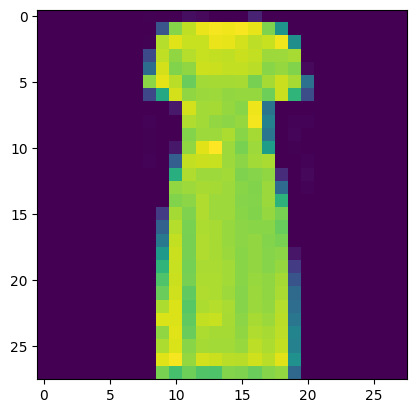

In [124]:
image = X_train_full[50, :].reshape(28, 28)
plt.imshow(image)
plt.show()

From the image shape values we can deduce that each image is 28 pixels by 28 pixels. Pixel values typically range from 0 to 255, with 0 representing black and 255 representing white. The intermediate values represent shades of gray. In this case, we will normalize the pixel values to a range of 0 to 1 by dividing by 255.

In [125]:
X_train_full  = X_train_full / 255.0
X_test = X_test / 255.0

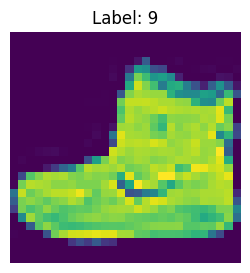

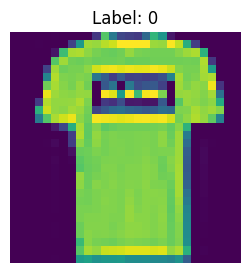

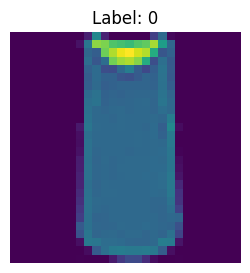

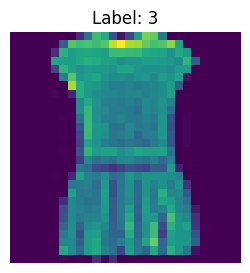

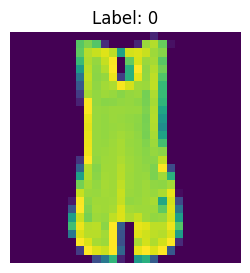

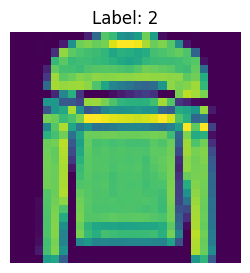

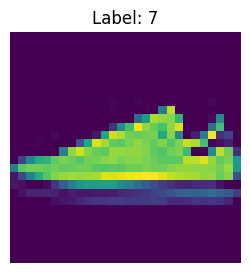

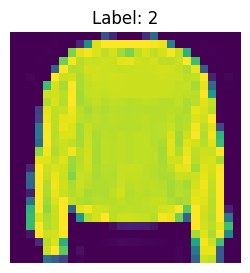

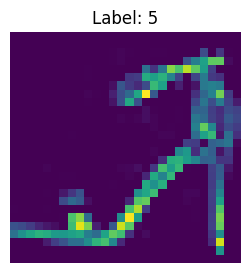

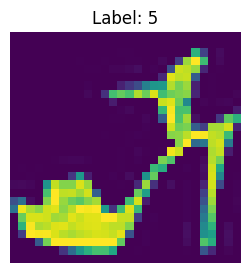

In [126]:
# Show images in defined range
for i in range(10):
    plt.figure(figsize=(3, 3))  # Adjust the size

    plt.imshow(X_train_full[i].reshape(28, 28))
    plt.title(f"Label: {y_train_full[i]}")
    plt.axis('off')
    plt.show()

Showing the first 30 images, we can get an idea of each label in the dataset and what they represent. The Tensorflow keras tutorial provides a list of labels and their corresponding numbers. I will apply the same labels to the images.

In [127]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

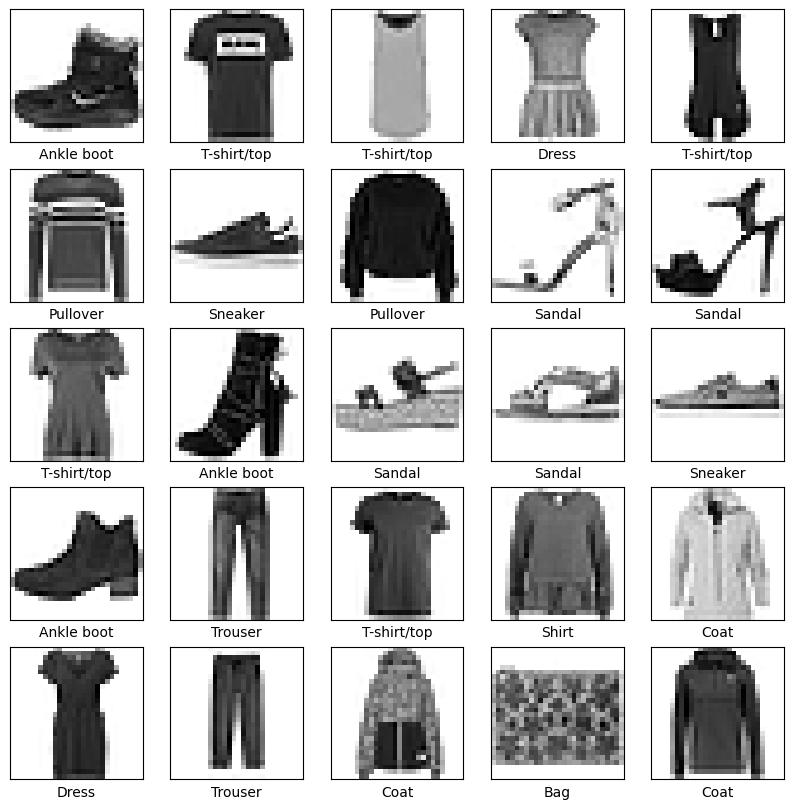

In [128]:
# Verify the data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])
plt.show()

In [129]:
from sklearn.model_selection import train_test_split

# Split the training data into 80% train and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print('\nvalidation dataset:', X_val.shape, y_val.shape)
print('\ntraining dataset:', X_train.shape, y_train.shape)
print('\ntest dataset:', X_test.shape, y_test.shape)




validation dataset: (12000, 28, 28) (12000,)

training dataset: (48000, 28, 28) (48000,)

test dataset: (10000, 28, 28) (10000,)


# Building the model

In [130]:
# Using a Sequential model API
base_model = keras.Sequential([
    keras.Input(shape=(28,28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [131]:
# Compile the model
base_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [135]:
# Train the model with validation data
base_model_history = base_model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_val, y_val)
 )


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9139 - loss: 0.2344 - val_accuracy: 0.8874 - val_loss: 0.3206
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9162 - loss: 0.2225 - val_accuracy: 0.8913 - val_loss: 0.3113
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9185 - loss: 0.2179 - val_accuracy: 0.8875 - val_loss: 0.3294
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9228 - loss: 0.2086 - val_accuracy: 0.8933 - val_loss: 0.3148
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9251 - loss: 0.2015 - val_accuracy: 0.8900 - val_loss: 0.3273
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9246 - loss: 0.2016 - val_accuracy: 0.8837 - val_loss: 0.3427
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9284 - loss: 0.1950 - val_accuracy: 0.8870 - val_loss: 0.3368
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9314 - loss: 0.1846 - 

# Accuracy and Loss Curves

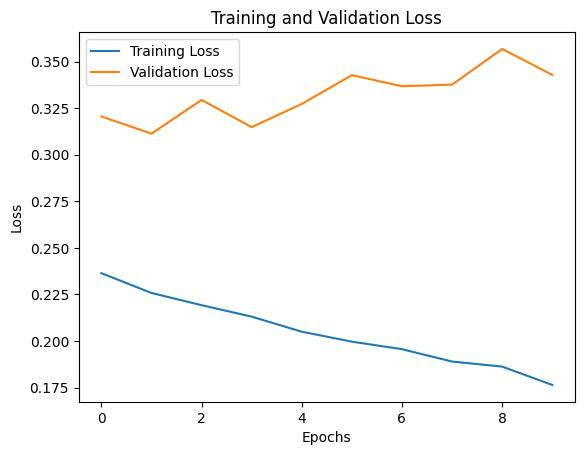

In [152]:
# Plot the training and validation loss
plt.plot(base_model_history.history['loss'], label='Training Loss')
plt.plot(base_model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


## Computing test accuracy

In [134]:
base_model_score = base_model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {base_model_score[1]}")
print(f'Test Loss: {base_model_score[0]}')


313/313 - 0s - 747us/step - accuracy: 0.8825 - loss: 0.3389
Test Accuracy: 0.8824999928474426
Test Loss: 0.33894041180610657


## Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


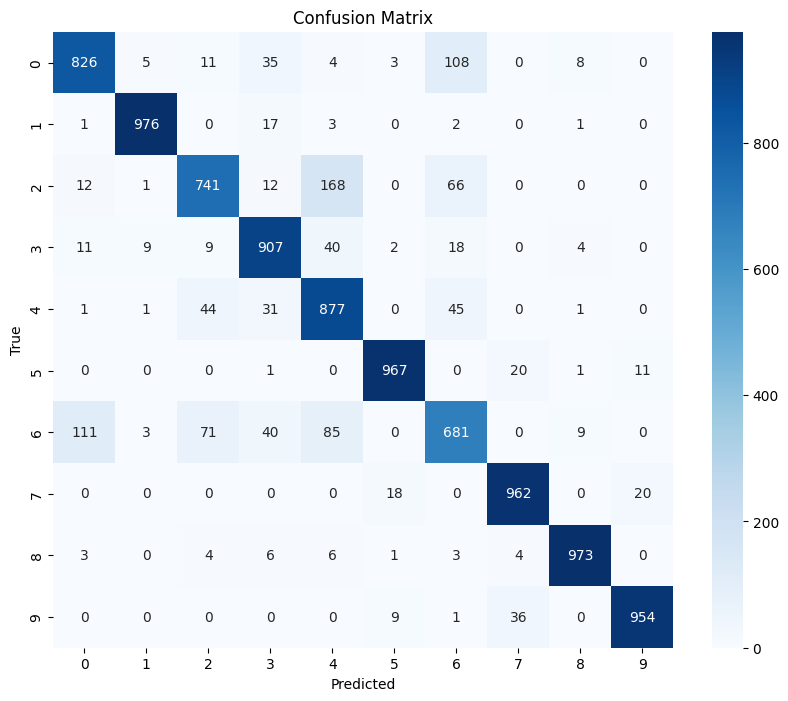

In [137]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the classes of the test data
y_pred = base_model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Evaluation

With a test accuracy evaluation of about 88%, it's hard to argue that the base model did not perform well. Looking at the confusion matrix, it appears the model misclassified shirts as some other clothing objects more often than other clothing items. It's also worth mentioning that the loss curve may indicate that the model could be overfitting. In the next section, I'll consider adding extra layers to minimize the observed issues and improve model performance.

## Experimentation

In [138]:
cnn_model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [139]:
# Compile the model
cnn_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [145]:
# Train the model
cnn_model_history = cnn_model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_val, y_val)
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9761 - loss: 0.0657 - val_accuracy: 0.9072 - val_loss: 0.3529
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9796 - loss: 0.0596 - val_accuracy: 0.9102 - val_loss: 0.3398
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9816 - loss: 0.0505 - val_accuracy: 0.9195 - val_loss: 0.3329
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9857 - loss: 0.0428 - val_accuracy: 0.9126 - val_loss: 0.3783
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9857 - loss: 0.0417 - val_accuracy: 0.9141 - val_loss: 0.4087
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9880 - loss: 0.0325 - val_accuracy: 0.9147 - val_loss: 0.4120
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9911 - loss: 0.0272 - val_accuracy: 0.9088 - val_loss: 0.4435
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9915 - loss: 0.0250 - 

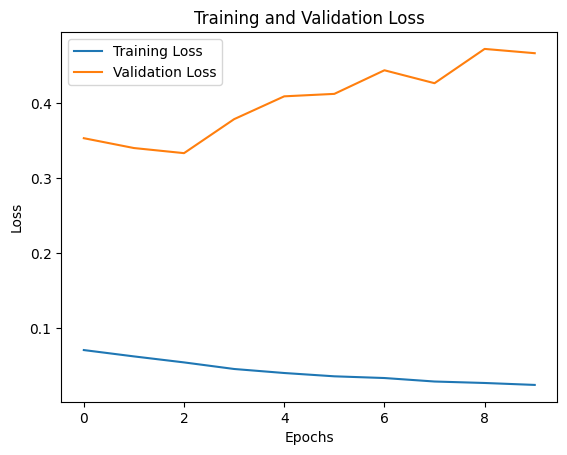

In [150]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(cnn_model_history.history['loss'], label='Training Loss')
plt.plot(cnn_model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [141]:
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")
print(f'Test Loss: {test_loss}')

313/313 - 1s - 2ms/step - accuracy: 0.9142 - loss: 0.3143
Test Accuracy: 0.9142000079154968
Test Loss: 0.3143121302127838


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


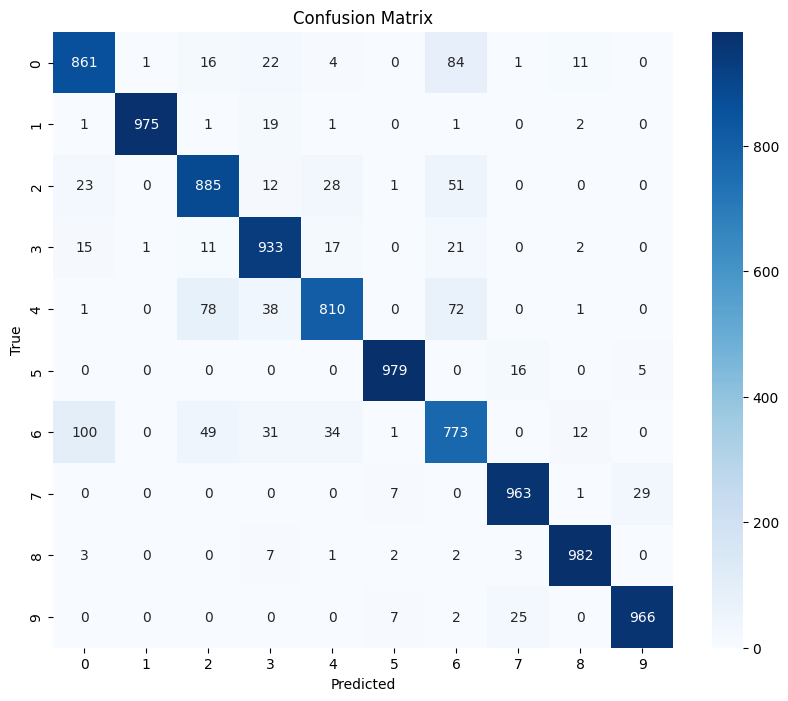

In [153]:
# Predict the classes of the test data
y_pred = cnn_model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Evaluation of CNN

The CNN model achieved a much higher accuracy score compared to the ase model, but the loss curve indicates that the model may be overfitting. The confusion matrix shows that the model is still misclassifying shirts as other clothing items, but the overall performance is significantly better than the base model.

In [154]:
cnn_model_2 = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0,2),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

In [155]:
# Compile the model
cnn_model_2.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [156]:
# Train the model
cnn_model_2_history = cnn_model_2.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_val, y_val)
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7400 - loss: 0.7263 - val_accuracy: 0.8693 - val_loss: 0.3516
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8713 - loss: 0.3587 - val_accuracy: 0.8898 - val_loss: 0.3006
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8893 - loss: 0.3011 - val_accuracy: 0.8999 - val_loss: 0.2793
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9001 - loss: 0.2726 - val_accuracy: 0.8987 - val_loss: 0.2709
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9066 - loss: 0.2496 - val_accuracy: 0.9051 - val_loss: 0.2679
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9155 - loss: 0.2255 - val_accuracy: 0.9063 - val_loss: 0.2586
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9248 - loss: 0.2010 - val_accuracy: 0.8979 - val_loss: 0.2753
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9309 - loss: 0

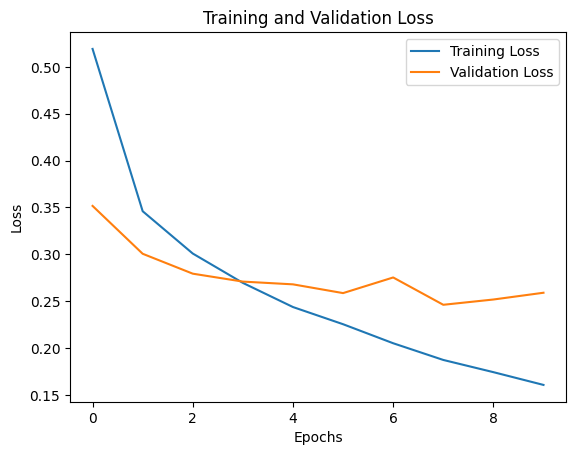

In [158]:
# Plot the training and validation loss
plt.plot(cnn_model_2_history.history['loss'], label='Training Loss')
plt.plot(cnn_model_2_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [159]:
test_loss, test_acc = cnn_model_2.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")
print(f'Test Loss: {test_loss}')

313/313 - 1s - 3ms/step - accuracy: 0.9082 - loss: 0.2679
Test Accuracy: 0.9082000255584717
Test Loss: 0.26786619424819946


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


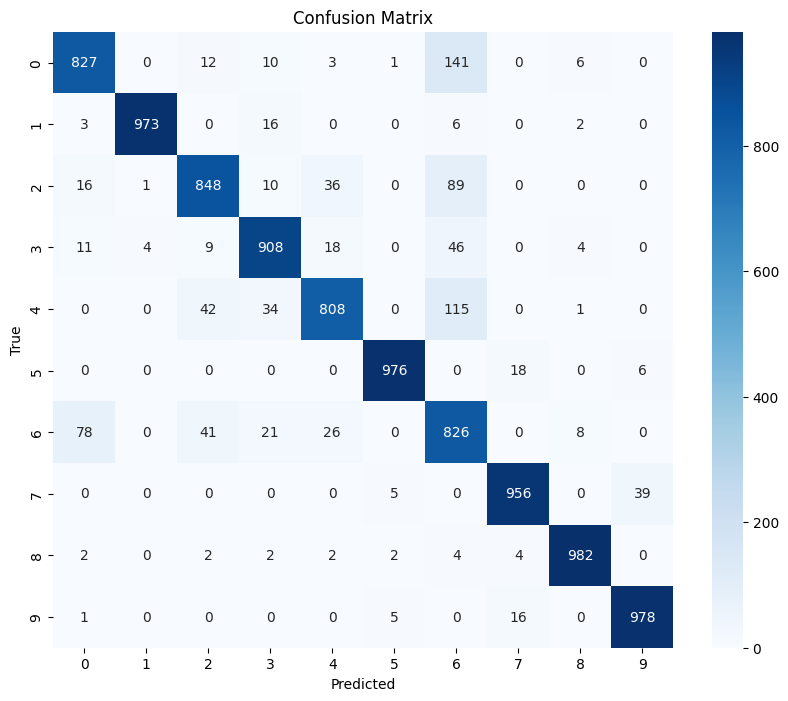

In [161]:
# Predict the classes of the test data
y_pred = cnn_model_2.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Evaluation of second CNN

The second model achieved a slightly lower accuracy score compared to the previous model, but observed a significant improvement in the loss curve. The confusion matrix results were also similar to the previous model. Because of the improvement to the loss curve I believe this model is the best of the three models.